# Digits recognition with clustering

`sklearn` has some built-in datasets. One of them is composed of small images of digits and the corresponding digit it represents (the label).

## Loading and visualizing the dataset

In [1]:
# Look at the documentation of the function load_digits.
# Use it to get the data (both X and y).
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
digits = load_digits()

In [2]:
# How many samples are in this dataset ?
# How many samples of the classe '7' are in this dataset ?
# How many features are in each input vector ?

print("In this dataset, there are {} samples in total, {} samples in the class '7' \
and {} features per input vector.".format(X.shape[0], y.tolist().count(7), digits.data.shape[1]))

In this dataset, there are 1797 samples in total, 179 samples in the class '7' and 64 features per input vector.


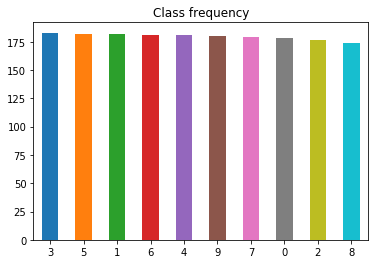

In [3]:
# Print the frequency of each class as an histogram.

from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

class_frequency = digits.target.tolist()
class_frequency = pd.Series(class_frequency).value_counts()
class_frequency.plot(kind = 'bar', rot = 0)
plt.title("Class frequency");

9
6
5


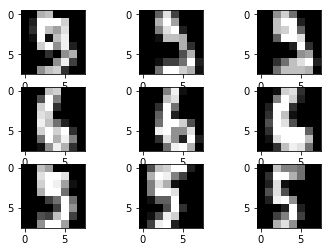

In [4]:
# Use the fonction imshow() of the plt library to represent
# as an image:
#   - 3 different samples of the class "9"
#   - 3 different samples of the class "6"
#   - 3 different samples of the class "5"

# Print all the images into the same plot (use subplots()
# with a size of 3x3 so that the first row contains "9", the
# second row contains "6" and the third row contains "5")

print_digits = [9, 6, 5]
print(*print_digits, sep='\n')
plt.gray()
for i_d in range(3):
    for j in range(3):
        digit = print_digits[i_d]
        plt.subplot(3, 3, 3*i_d +j+1);
        plt.imshow(digits.images[10*j + digit])

**NB:** This works because the first 30 digits are ordered:

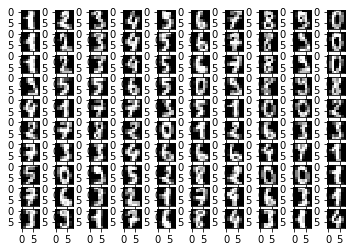

In [5]:
for i in range(1,101):
    plt.subplot(10, 10, i)
    plt.imshow(digits.images[i])

## Predicting digits with K-means

In [6]:
# Separate the dataset into a train and test size with
# random_state = 0.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
X_train.shape # 1347 digits, 64 features (pixel values)

(1347, 64)

In [8]:
# With the class KMeans, create a model that clusterize the 
# training data. Use the right number of clusters.

from sklearn.cluster import KMeans
model = KMeans(n_clusters=10)
model.fit(X_train);

In [9]:
model.cluster_centers_.shape

(10, 64)

In [10]:
model.labels_.shape

(1347,)

In [11]:
# The model learns 2 things:
#   - the position of each centroid (model.cluster_centers_)
#   - the id of the cluster to which each point belongs (model.labels_)

centroid_centers = model.cluster_centers_.reshape(10, 8, 8)

# Use the above information to build, for each centroid,
# the list of points and their label belonging to that 
# centroid.

centroid_point_lists = [[] for i in range(10)]
for i_x in range(len(X_train)):
    x = X_train[i_x]
    l = model.labels_[i_x]
    centroid_point_lists[l].append(x)

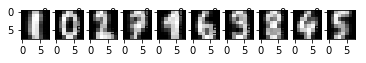

In [12]:
# Then build a mapping between a cluster id and the class it
# represents (use a dictionary for this).

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(centroid_centers[i])

In [13]:
# kmeans is an unsupervised learning algorithm, thus we do not have
# an easy way to get the cluster -> label mapping (we could take the
# most represented label for each cluster, but I did not got a
# bijection by doing that) so the easiest is perhaps to do it by hand.
centroid_labels = [3, 0, 2, 7, 1, 6, 9, 8, 4, 5]
cluster_id_to_class = {i: centroid_labels[i] for i in range(10)}
print(cluster_id_to_class)

{0: 3, 1: 0, 2: 2, 3: 7, 4: 1, 5: 6, 6: 9, 7: 8, 8: 4, 9: 5}


In [14]:
# Look at the documentation of the .predict() method of your
# model. Use it to find the class predicted by your model
# for each point of your test set.

y_pred = model.predict(X_test)
y_pred = list(map(cluster_id_to_class.get, y_pred))
print(y_pred[:50])

[2, 8, 2, 6, 6, 7, 3, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7, 8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 9, 3, 0, 1, 8, 6, 7, 7, 1, 0, 7, 6, 2, 1]


In [15]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print('Accuracy: {0:f}'.format(score))

Accuracy: 0.740000


## Combining PCA and Kmeans for prediction

In [16]:
# Use the PCA algorithm to transform the digits data
# (all of them i.e. both train and test) into a 3-dimensional
# dataset.

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
X3 = pca.transform(X)

In [17]:
X3.shape

(1797, 3)

In [18]:
y.shape

(1797,)

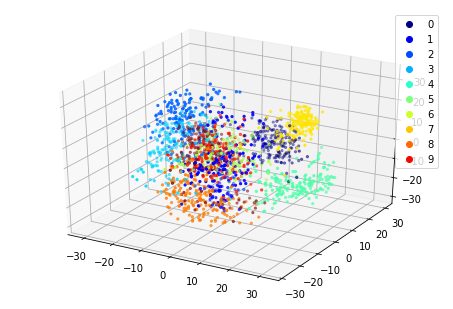

In [19]:
# Print the reduced dataset on a 3D figure.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

cmap_name = 'jet'
plt.set_cmap(cmap_name)
ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=y, s=5);

# hack for printing a legend on a 3d plot

from matplotlib.lines import Line2D

colors = [plt.get_cmap(cmap_name)(i/10) for i in range(10)]
dummy_plot = [Line2D([0],[0], linestyle="none", c=colors[i], marker = 'o') for i in range(10)]
ax.legend(dummy_plot, range(10), numpoints = 1);

In [20]:
# Train another KMeans on the 3D dataset. Compare its accuracy
# against the previous KMeans model. Do you get better results ?

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, random_state=0)
model3 = KMeans(n_clusters=10)
model3.fit(X_train);

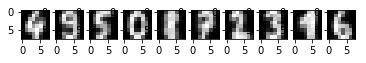

In [21]:
centroid_centers = model3.cluster_centers_.reshape(10, 8, 8)
plt.gray()
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(centroid_centers[i])

In [22]:
centroid_labels = [4, 9, 5, 0, 8, 7, 2, 3, 1, 6]
cluster_id_to_class = {i: centroid_labels[i] for i in range(10)}

y3_pred = model3.predict(X_test)
y3_pred = list(map(cluster_id_to_class.get, y3_pred))
score = accuracy_score(y3_test, y3_pred)
print('Accuracy: {0:f}'.format(score))

Accuracy: 0.791111


**Answer:** We get better result (accuracy 74% -> 79%), and it seems that the centroids are more representative of the digits (especially for the 3 that is way more different from the 8 on the PCA version).